<a href="https://colab.research.google.com/github/gabrielantonyxaviour/aptos-hack/blob/ML-model-to-predict-influencers-score-and-correlation-factor/ML_model_to_predict_influencers_score_and_correlation_factor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML MODEL

# Load Data

In [36]:
import numpy as np
import pandas as pd

In [37]:
from google.colab import files

In [38]:
uploaded = files.upload()

Saving modified_influencer_dataset (1).csv to modified_influencer_dataset (1) (1).csv


In [5]:
import io

In [39]:
df = pd.read_csv(io.BytesIO(uploaded['modified_influencer_dataset (1) (1).csv']))
df

,Follower Count,Likes,Comments,Engagement Rate,Quality of Followers,Ad Products Sold,Berries,Likes Frequency,Comments Frequency,Selective Liking,Selective Commenting,Bank Balance in dollars,Social Status,Credibility Weight
0,6424388,109867,28373,3,4,3992,51271,79,20,0,1,22841,6,13707
1,6551634,434061,30730,6,9,4823,153020,11,23,1,0,41277,8,24769
2,4305572,541629,9982,4,9,3517,174302,60,34,0,0,37826,9,22699
3,2235489,577363,33361,0,3,2268,193312,55,10,0,0,18967,9,11384
4,9959614,154326,45497,0,2,9836,76737,69,27,0,1,42656,1,25594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6990875,475585,11177,9,9,9791,150445,76,21,1,1,12046,4,7229
4996,9892669,950053,35102,8,5,9236,307704,94,8,1,0,28471,5,17085
4997,8902674,91779,42417,2,3,5319,56130,56,15,1,1,40983,8,24593
4998,4009146,681165,13348,8,3,1867,216360,19,25,0,1,29603,3,17763


# Data preperation

## Data seperation as X and Y

In [40]:
y = df['Berries']
y

,Berries
0,51271
1,153020
2,174302
3,193312
4,76737
...,...
4995,150445
4996,307704
4997,56130
4998,216360


In [41]:
x = df.drop('Berries',axis=1)
x

,Follower Count,Likes,Comments,Engagement Rate,Quality of Followers,Ad Products Sold,Likes Frequency,Comments Frequency,Selective Liking,Selective Commenting,Bank Balance in dollars,Social Status,Credibility Weight
0,6424388,109867,28373,3,4,3992,79,20,0,1,22841,6,13707
1,6551634,434061,30730,6,9,4823,11,23,1,0,41277,8,24769
2,4305572,541629,9982,4,9,3517,60,34,0,0,37826,9,22699
3,2235489,577363,33361,0,3,2268,55,10,0,0,18967,9,11384
4,9959614,154326,45497,0,2,9836,69,27,0,1,42656,1,25594
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6990875,475585,11177,9,9,9791,76,21,1,1,12046,4,7229
4996,9892669,950053,35102,8,5,9236,94,8,1,0,28471,5,17085
4997,8902674,91779,42417,2,3,5319,56,15,1,1,40983,8,24593
4998,4009146,681165,13348,8,3,1867,19,25,0,1,29603,3,17763


## Data splitting

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


In [43]:
x_train

,Follower Count,Likes,Comments,Engagement Rate,Quality of Followers,Ad Products Sold,Likes Frequency,Comments Frequency,Selective Liking,Selective Commenting,Bank Balance in dollars,Social Status,Credibility Weight
4833,1418231,924453,39720,5,8,3794,43,23,1,0,36873,9,22127
1218,8370689,384196,11302,7,6,1462,56,23,1,1,27596,7,16560
135,6707971,480851,9501,4,5,705,97,3,1,0,49106,5,29466
3612,6790408,117469,46549,10,8,1199,24,18,0,0,49053,1,29432
3259,6501785,955525,5618,6,5,5972,35,25,0,0,44483,9,26693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4149,9856780,828904,46563,2,8,1299,2,41,0,1,42180,4,25310
1890,8890782,874902,49955,4,4,8637,4,1,1,1,2566,1,1540
350,3376957,476252,22681,4,3,623,38,39,1,0,38062,1,22838
79,5518209,630074,47793,1,3,3111,25,4,1,0,15252,4,9153


In [44]:
x_test

,Follower Count,Likes,Comments,Engagement Rate,Quality of Followers,Ad Products Sold,Likes Frequency,Comments Frequency,Selective Liking,Selective Commenting,Bank Balance in dollars,Social Status,Credibility Weight
789,9302434,945954,42866,7,2,6680,22,30,0,1,29856,2,17914
2507,4464158,784852,45795,10,9,4887,93,34,0,0,28174,1,16905
2376,3416871,627863,35063,9,4,215,52,16,0,0,15329,6,9200
1378,4181303,153806,38654,5,1,9834,98,12,1,0,37284,2,22371
598,1345027,444944,374,4,6,1097,35,3,0,1,36100,7,21663
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,5069002,215805,37011,10,5,2023,36,33,0,0,43272,2,25964
4921,54687,225925,18271,4,8,4790,91,19,0,0,7887,4,4734
3091,8067513,408648,21234,7,3,6330,93,37,0,0,45995,2,27598
3683,880459,568278,11812,6,8,698,72,29,0,0,30292,6,18178


# **Model building**

## **Linear Regression**

### Traning model

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Apply model to make prediction

In [46]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [47]:
y_lr_train_pred

array([303843.43593588, 125888.95967941, 157856.17432798, ...,
       161079.34054738, 215668.24480388, 265766.77913479])

In [48]:
y_lr_test_pred

array([310602.13254375, 263440.61191124, 208658.74483742,  72192.77158549,
       140173.52261904, 143272.69870929, 268796.36508411, 245796.34284343,
       299317.05441953, 115651.28723856,  57921.89535758,  41502.05973243,
       214228.88459444, 128209.66624231, 156633.3606388 ,  54656.94847743,
       132459.03889241, 253447.15059856, 133835.43146271, 189288.25725249,
       231846.62628501, 247061.73242722, 229245.51222856, 169544.73013565,
       239750.41812033, 252827.00437999, 289431.53015718, 270754.65544557,
        25557.63482133, 198005.69763492, 165422.96896669, 202317.79425771,
       278949.65186194, 126117.21729215, 166086.38729677, 197066.78355921,
       116222.37501193, 206710.84435136, 152401.61105285, 121746.80557185,
       214545.04314359, 143439.25967746, 251998.02098112,  96084.36131007,
       276433.08578566,  28859.85361843, 109357.30355965,  95666.07767995,
        93779.3188229 , 150064.06238493,  61631.24111905, 244723.06854394,
        65508.24630194, 2

###Evaluate model performance

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [50]:
print("Linear Regression Model Performance:")
print("Training MSE:", lr_train_mse)
print("Training R2:", lr_train_r2)
print("Test MSE:", lr_test_mse)
print("Test R2:", lr_test_r2)

Linear Regression Model Performance:
Training MSE: 0.08331582187182386
Training R2: 0.9999999999888407
Test MSE: 0.08266108833853042
Test R2: 0.9999999999893592


In [51]:
lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Testing MSE','Test R2']

In [52]:
lr_results

,Method,Training MSE,Training R2,Testing MSE,Test R2
0,Linear regression,0.083316,1.0,0.082661,1.0


## Random Forest

## Training the model

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### Applying the model to make a prediction

In [54]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

### Evaluating Model performance

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [56]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,448059264.718379,0.939987,483770224.504968,0.937725


## Model Comparison

In [57]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Testing MSE,Test R2,Test MSE
0,Linear regression,0.083316,1.0,0.082661,1.0,NaN
1,Random forest,448059264.718379,0.939987,NaN,0.937725,483770224.504968


from matplotlib import pyplot as plt
import seaborn as sns
_df_16.groupby('Method').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_17.groupby('Training MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_18.groupby('Training R2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('Testing MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Training MSE'].value_counts()
    for x_label, grp in _df_20.groupby('Method')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Method')
_ = plt.ylabel('Training MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Training R2'].value_counts()
    for x_label, grp in _df_21.groupby('Training MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training MSE')
_ = plt.ylabel('Training R2')

<string>:5: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Testing MSE'].value_counts()
    for x_label, grp in _df_22.groupby('Training R2')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training R2')
_ = plt.ylabel('Testing MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Test R2'].value_counts()
    for x_label, grp in _df_23.groupby('Testing MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Testing MSE')
_ = plt.ylabel('Test R2')

In [58]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Testing MSE,Test R2,Test MSE
0,Linear regression,0.083316,1.0,0.082661,1.0,NaN
1,Random forest,448059264.718379,0.939987,NaN,0.937725,483770224.504968


from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('Method').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('Training MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('Training R2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('Testing MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Training MSE'].value_counts()
    for x_label, grp in _df_12.groupby('Method')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Method')
_ = plt.ylabel('Training MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Training R2'].value_counts()
    for x_label, grp in _df_13.groupby('Training MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training MSE')
_ = plt.ylabel('Training R2')

<string>:5: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Testing MSE'].value_counts()
    for x_label, grp in _df_14.groupby('Training R2')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training R2')
_ = plt.ylabel('Testing MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Test R2'].value_counts()
    for x_label, grp in _df_15.groupby('Testing MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Testing MSE')
_ = plt.ylabel('Test R2')

# Data visualization of predicted result

Text(0.5, 0, 'Experimental Score')

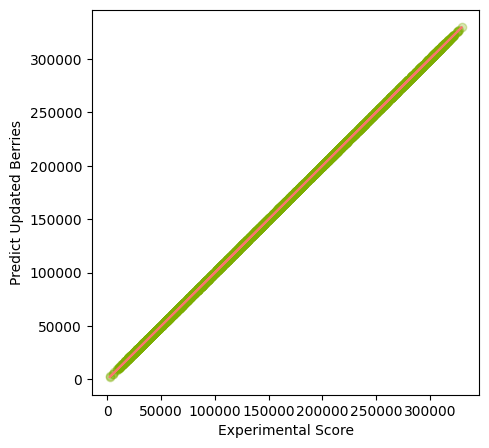

In [59]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train,p(y_train),"#F8766D")
plt.ylabel('Predict Berries')
plt.xlabel('Experimental Score')

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame containing the data

# Separate features (x) and target (y)
y = df['Berries']
x = df.drop('Berries', axis=1)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# To predict the 'Influencer Score' for new data, use:
# new_data_predictions = model.predict(new_data)

Mean Squared Error: 0.08266108833853042
R-squared: 0.9999999999893592


In [62]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlation of 'Influencer Score' with other parameters
influencer_score_corr = correlation_matrix['Berries']

# Print the correlations
print(influencer_score_corr)

# You can also sort the correlations in descending order:
sorted_corr = influencer_score_corr.sort_values(ascending=False)
print(sorted_corr)

Follower Count            -0.025110
Likes                      0.996130
Comments                   0.100668
Engagement Rate           -0.021332
Quality of Followers      -0.005876
Ad Products Sold          -0.015121
Berries                    1.000000
Likes Frequency            0.003711
Comments Frequency        -0.008720
Selective Liking           0.000092
Selective Commenting      -0.027049
Bank Balance in dollars    0.037269
Social Status              0.012185
Credibility Weight         0.037270
Name: Berries, dtype: float64
Berries                    1.000000
Likes                      0.996130
Comments                   0.100668
Credibility Weight         0.037270
Bank Balance in dollars    0.037269
Social Status              0.012185
Likes Frequency            0.003711
Selective Liking           0.000092
Quality of Followers      -0.005876
Comments Frequency        -0.008720
Ad Products Sold          -0.015121
Engagement Rate           -0.021332
Follower Count            -0.02511

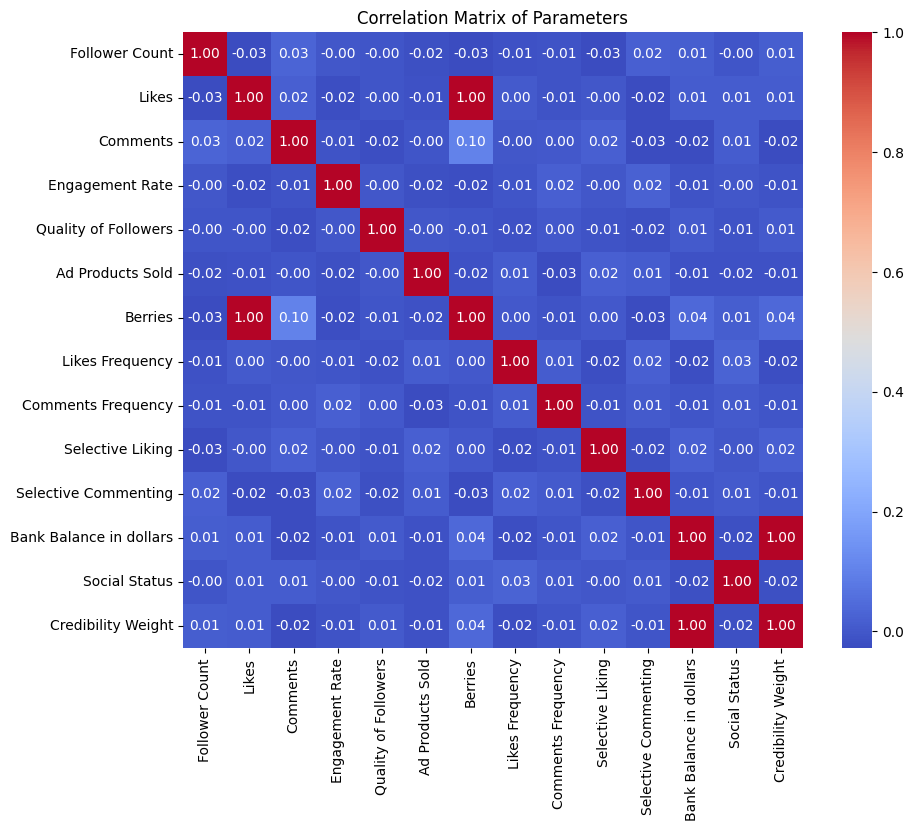

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Parameters")
plt.show()

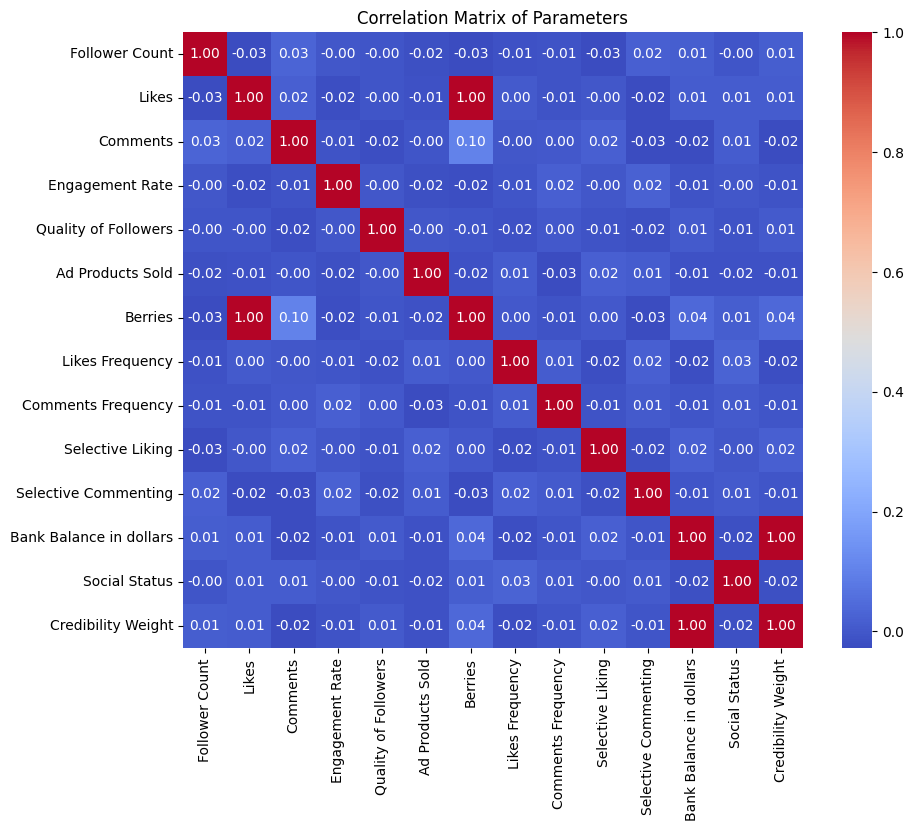

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Parameters")
plt.show()

In [65]:
import pandas as pd

# Assuming 'model' is your trained Linear Regression model
# (from your previous code: model = LinearRegression(); model.fit(x_train, y_train))

# Create a dictionary with your input values
input_data = {
    'Follower Count': [10000],  # Replace with your desired value
    'Likes': [500],            # Replace with your desired value
    'Comments': [100],          # Replace with your desired value
    'Engagement Rate': [0.05],   # Replace with your desired value
    'Quality of Followers': [0.8],# Replace with your desired value
    'Ad Products Sold': [20],   # Replace with your desired value
    'Likes Frequency': [10],     # Replace with your desired value
    'Comments Frequency': [5],    # Replace with your desired value
    'Selective Liking': [0.2],   # Replace with your desired value
    'Selective Commenting': [0.1], # Replace with your desired value
    'Bank Balance in dollars': [10000],# Replace with your desired value
    'Social Status': [0.7],     # Replace with your desired value
    'Credibility Weight': [0.9]  # Replace with your desired value
}

# Create a DataFrame from the input data
input_df = pd.DataFrame(input_data)

# Make the prediction
predicted_berries = model.predict(input_df)

# Print the prediction
print("Predicted Berries:", predicted_berries[0])

Predicted Berries: 2393.8341834098555


In [66]:
import pandas as pd
import numpy as np

# Assuming 'model' is your trained Linear Regression model

# Create a dictionary with your input values
input_data = {
    'Follower Count': [10000],  # Replace with your desired value
    'Likes': [500],            # Replace with your desired value
    'Comments': [100],          # Replace with your desired value
    'Engagement Rate': [0.05],   # Replace with your desired value
    'Quality of Followers': [0.8],# Replace with your desired value
    'Ad Products Sold': [20],   # Replace with your desired value
    'Likes Frequency': [10],     # Replace with your desired value
    'Comments Frequency': [5],    # Replace with your desired value
    'Selective Liking': [0.2],   # Replace with your desired value
    'Selective Commenting': [0.1], # Replace with your desired value
    'Bank Balance in dollars': [10000],# Replace with your desired value
    'Social Status': [0.7],     # Replace with your desired value
    'Credibility Weight': [0.9]  # Replace with your desired value
}

# Create a DataFrame from the input data
input_df = pd.DataFrame(input_data)

# Make the prediction
predicted_berries = model.predict(input_df)

# Round off the prediction
rounded_berries = np.round(predicted_berries[0])

# Print the rounded prediction
print("Predicted Berries (Rounded):", rounded_berries)

Predicted Berries (Rounded): 2394.0
